# CMSC 478-ML Homework 3
## By: Pravar Kochar

In [1]:
import matplotlib.pyplot as plot
import numpy as np

# Include the self made Data class.
from HW3_functions import Data
from HW3_functions import Flower
from IPython.display import display, Latex

# Constants to work on input data correctly.
LINEAR_REGRESSION = False
LOGISTIC_REGRESSION = True

### Question 1

---
__Question 1__. Consider the dataset cars.csv (same as Homework 2) which has observations for 32 different models of cars
on mileage and 10 other features affecting the mileage. Perform the following tasks.

---

In [2]:
# Initialize in the data from the .csv file.
car = Data('cars.csv', LINEAR_REGRESSION)

---
__Question 1a__. Using the multiple linear hypothesis learned in Homework 2 to predict the car mileage based on all mean normalized features, obtain the estimated mileage, and error in estimation for each car model. Report the observed mileage, estimated mileage, and error in estimation for all car models in the form of a table. Calculate R2 and Adjusted R2. Interpret your results.

---

In [3]:
# Scale the features to run GD.
car.scale_features()
# Run the GD.
cars_theta = car.gradient_descent()
estimate_milage = car.resp_prediction(cars_theta)

car.print_error_of_pred(estimate_milage)
display(Latex(f"$R^2 = {format(car.calc_r_squared(), '.5f')}$,\n$Adjusted-R^2 = {format(car.calc_adj_r_sq(), '.5f')}$"))

+----------------+-------------------+--------------------+-------------------+
|  Car instance  |  Observed milage  |  Predicted milage  |  Error in milage  |
+================+===================+====================+===================+
|       1        |        21         |      22.5992       |      1.5992       |
|       2        |        21         |      22.1117       |      1.1117       |
|       3        |       22.8        |       26.251       |       3.451       |
|       4        |       21.4        |      21.2371       |      0.1629       |
|       5        |       18.7        |      17.6931       |      1.0069       |
|       6        |       18.1        |      20.3831       |      2.2831       |
|       7        |       14.3        |      14.3859       |      0.0859       |
|       8        |       24.4        |      22.4959       |      1.9041       |
|       9        |       22.8        |      24.4188       |      1.6188       |
|       10       |       19.2        |  

<IPython.core.display.Latex object>

$R^2$ and $Adjusted \textendash R^2$ are in the $0.8$ range, but the $Adjusted \textendash R^2$ is $0.81543$
which is
less than $R^2=0.86902$.
This shows that having the 10 features isn't as good since $R^2$ could be affected by the measure
 just having more features than features bein actually significant.
Thus, $Adjusted \textendash R^2$ is a much better measure for the accuracy of our result.

---
__Question 1b.__ Obtain the estimated mileage, and error in estimation for each car model using a leave-one-out cross-validation scheme for learning a linear regression hypothesis to predict the car mileage based on all mean normalized features. Report the observed mileage, estimated mileage, and error in estimation for all car models in the form of a table. Calculate the cross-validation R2 and Adjusted R2. Interpret your results.

---

In [4]:
def LOOCV():
    # Simulate the LOOCV method.
    milage_est_lst = []
    for leave_idx in range(car.data_count):
        idx_minus_car_theta = car.gradient_descent([leave_idx])
        est_milage_test = car.resp_pred_test_data(idx_minus_car_theta, [leave_idx])[0]
        milage_est_lst.append(est_milage_test)
    return milage_est_lst

est_milage_LOO = LOOCV()
car.print_error_of_pred(est_milage_LOO, "LOOCV Predicted milage", "LOOCV Errors")
display(Latex(f"$cross-validation\ R^2 = {format(car.calc_r_squared(est_milage_LOO), '.5f')}$,"
              f"\n$cross-validation\ Adjusted-R^2 = {format(car.calc_adj_r_sq(), '.5f')}$"))

+----------------+-------------------+--------------------------+----------------+
|  Car instance  |  Observed milage  |  LOOCV Predicted milage  |  LOOCV Errors  |
+================+===================+==========================+================+
|       1        |        21         |         23.2927          |     2.2927     |
|       2        |        21         |         22.5663          |     1.5663     |
|       3        |       22.8        |         27.3338          |     4.5338     |
|       4        |       21.4        |          21.189          |     0.211      |
|       5        |       18.7        |         17.4421          |     1.2579     |
|       6        |       18.1        |         21.2811          |     3.1811     |
|       7        |       14.3        |         14.4273          |     0.1273     |
|       8        |       24.4        |         21.5571          |     2.8429     |
|       9        |       22.8        |         29.0803          |     6.2803     |
|   

<IPython.core.display.Latex object>

According to the $CV\ Adjusted \textendash R^2$ above, which is significantly lower than the
$Adjusted \textendash R^2$ calculated in $1.a$ shows that our proposed modal is data dependent
and is over-fitting on the given data, causing the modal to perform significantly worse on an
"unseen" test data when seen using $LOOCV()$ method.

---
__Question 1c.__  For k = 1, . . . , 10, learn a multiple linear hypothesis to predict the car mileage based on the first k mean
normalized features. For each learning task, calculate the R2 and Adjusted R2. In a single plot
show how the R2 and Adjusted R2 change as k increases. Interpret your results.

---

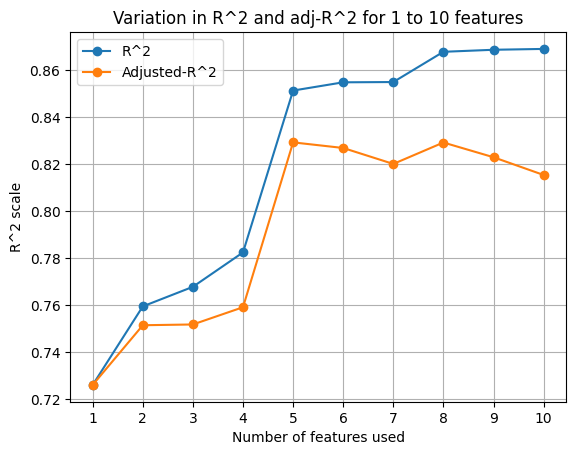

In [5]:
def plot_r_sq_lines(line1, line2):
    plot.plot(range(1, len(line1) + 1), line1, '-o', label=f'R^2')
    plot.plot(range(1, len(line2) + 1), line2, '-o', label=f'Adjusted-R^2')
    plot.xticks(range(1, len(line1) + 1), range(1, len(line1) + 1))
    plot.title("Variation in R^2 and adj-R^2 for 1 to 10 features")
    plot.xlabel('Number of features used')
    plot.ylabel('R^2 scale')
    plot.legend()
    plot.grid()
    plot.show()

def MLR_1_to_10_ft():
    # Make 10 new cars data.
    r_2_lst = []
    adj_r_2_lst = []
    for no_ft in range(1, 11):
        # (for reference) idx + 1 is the number of features used.
        cr = Data('cars.csv', LINEAR_REGRESSION, no_ft)
        cr.scale_features()    # Scale the data.
        cr_theta = cr.gradient_descent()
        # Calculate and store the r^2 and adj-r^2 response.
        r_2_lst.append(cr.calc_r_squared(cr.resp_prediction(cr_theta)))
        adj_r_2_lst.append(cr.calc_adj_r_sq())
    plot_r_sq_lines(r_2_lst, adj_r_2_lst)

MLR_1_to_10_ft()

# End the question 1.
del car

As seen from the graph the $R^2$ and $Adjusted \textendash R^2$ values more or less increase parallely up till 4 features ($Adjusted \textendash R^2$ is a bit lower showing that $R^2$ isn't an accurate measure as in $1.a$).
Although after 4 features the $Adjusted \textendash R^2$ and $R^2$ lines diverge showing that after 4 features additional features makes the model over-fit on the data, and the actual accuracy of the model drops there after.

### Question 2

---
__Question 2.__
    Consider the dataset cancer.csv which has binary observations for 19 different individuals on LungCancer
and Smoking defined as follows.
$lung\ Cancer\ = \left\{ \begin{dcases}
                        1, &if\ has\ lung\ cancer \\
                        0, &otherwise \\
                \end{dcases} \right. $
$Smoking\ = \left\{ \begin{dcases}
                        1, & if\ smokes \\
                        0, & otherwise \\
                \end{dcases} \right. $

---

In [6]:
# Initialize in the data from the .csv file.
cancer_patient_data = Data('cancer.csv', LOGISTIC_REGRESSION)
# "Scale the features" to be able to run the GD.
cancer_patient_data.scale_features()

__Question 2a.__
Learn the probability of LungCancer as a function of Smoking using the following hypothesis.
$Prob(LungCancer\ =\ 1|Smoking)\ =\ \frac{1}{1 + e^{−(θ_0 + θ_{1}*Smoking)}}$

---

In [7]:
# Run the GD.
cancer_thetas = cancer_patient_data.gradient_descent()
estimate_cancer = cancer_patient_data.resp_prediction(cancer_thetas, True)
cancer_patient_data.print_logistic_pred(estimate_cancer, "Patient #", "Patient_status",
                                        "Patient_status_predicted")

+-------------+------------------+----------------------------+
|  Patient #  |  Patient_status  |  Patient_status_predicted  |
+=============+==================+============================+
|      1      |        1         |             0              |
|      2      |        0         |             0              |
|      3      |        1         |             1              |
|      4      |        0         |             1              |
|      5      |        0         |             0              |
|      6      |        1         |             0              |
|      7      |        1         |             0              |
|      8      |        0         |             0              |
|      9      |        0         |             1              |
|     10      |        1         |             1              |
|     11      |        0         |             0              |
|     12      |        0         |             0              |
|     13      |        1         |      

---
__Question 2b.__ Using the probabilities learned in 2a, classify each individual into one of the two lung cancer categories.
Report the confusion matrix, percentage of correct classification, precision, recall, specificity, and F1
score. Interpret your results.

---

In [8]:
# Print the confusion matrix and report requested values.
cancer_patient_data.calc_print_confusion_matrix(estimate_cancer, 'Cancer', 'NO Cancer')

							Confusion matrix
+--------------------------+--------------------+-----------------------+
| Observation\Prediction   |  Predicted Cancer  |  Predicted NO Cancer  |
+==========================+====================+=======================+
| Observed Cancer          |         6          |           4           |
| Observed NO Cancer       |         4          |           5           |
+--------------------------+--------------------+-----------------------+


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

From the measures it is seen that the correct classification is ~0.58 which means ~0.42 of the
given data is inaccurately classified.
Also with an $F_1$ score of $0.6$ the fit of the model is not very good.

---
__Question 2c.__ What can you say about the following? How much more likely a smoker is for having
 lung cancer as compared to a non-smoker?

---


In [9]:
# print Odds Ratio.
cancer_patient_data.odds_ratio(cancer_thetas)

# End of Q2.
del cancer_patient_data

Odds of cancer given smoking over odds of cancer given non-smoker: 1.8736608189997126


Thus, from the Odds Ratio it is seen it is lot likely to have cancer if a person smokes.

### Question 3

---
__Question 3.__ Consider the dataset emails.csv which has observations for 20 different emails
on SpamFlag and 2 other features, viz. SubjectLength and SuspiciousWordCount defined as follows.
SpamFlag =  1, if an email is spam, 0, otherwise.
SubjectLength = the number of words in the subject line.
SuspiciousWordCount = the number of suspicious words like money, dollars, lottery, prize, jewelry, etc.

---


In [10]:
# Initialize in the data from the .csv file.
email_data = Data('emails.csv', LOGISTIC_REGRESSION)
# "Scale the features" to be able to run the GD.
email_data.scale_features()

---
__Question 3a.__ Make a scatter plot of SubjectLength (on y-axis) and SuspiciousWordCount (on
x-axis). Label each point (email) on the scatter plot according to its SpamFlag using different
colors or symbols. What is your interpretation of the plot?

---

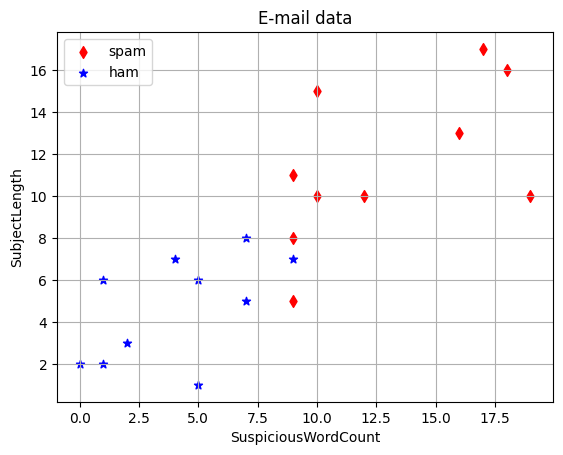

In [11]:
def plot_scatter_plot():
    x = email_data.raw_data["SuspiciousWordCount"]
    y = email_data.raw_data["SubjectLength"]
    for i in range(email_data.data_count):
        x_i = x[i]
        y_i = y[i]
        # If ham
        if int(email_data.raw_data[email_data.vr.vr_response][i]) == 0:
            shape = '*'
            col = 'b'
        else:
            shape = 'd'
            col = 'r'

        plot.scatter(x_i, y_i, marker=shape, color=col)

    plot.title("E-mail data")
    plot.xlabel('SuspiciousWordCount')
    plot.ylabel('SubjectLength')
    plot.legend(['spam', 'ham'])
    plot.grid()
    plot.show()

plot_scatter_plot()

The plot has an linear trend to it. Increasing the the number of SuspiciousWordCount above ~9 and
 SubjectLength above ~8 is classified as spam, anything below is ham (not spam).

---
__Question 3b.__ Learn the probability of SpamFlag as a function of SubjectLength and SuspiciousWordCount using
the given hypothesis.

---

In [12]:
spam_detect_theta = email_data.gradient_descent(None, 0.2, 10 ** -4)
spam_prediction = email_data.resp_prediction(spam_detect_theta, False)
email_data.print_logistic_pred(spam_prediction, "Mail #", "Mail spam (1-spam,0-ham)", "Prediction probability", True)

+----------+----------------------------+--------------------------+
|  Mail #  |  Mail spam (1-spam,0-ham)  |  Prediction probability  |
+==========+============================+==========================+
|    1     |             1              |          0.9847          |
|    2     |             0              |          0.0116          |
|    3     |             1              |          0.8728          |
|    4     |             1              |            1             |
|    5     |             0              |            0             |
|    6     |             1              |          0.9999          |
|    7     |             1              |            1             |
|    8     |             1              |          0.9953          |
|    9     |             1              |            1             |
|    10    |             0              |            0             |
|    11    |             0              |          0.727           |
|    12    |             0        

---
__Question 3c.__ Plot/overlay the decision boundary corresponding to the learned hypothesis from 3b on the scatter plot
from 3a. What is your interpretation of the plot?

---

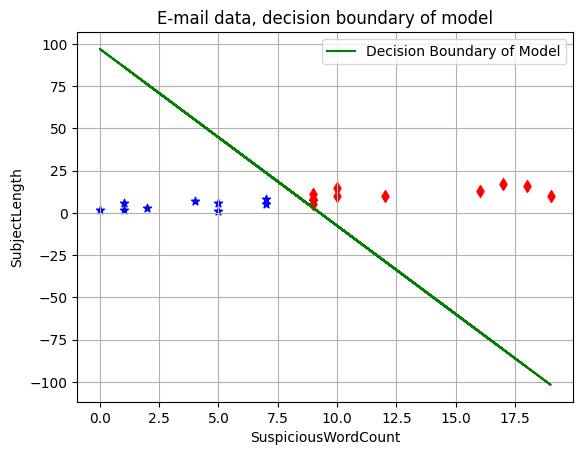

In [13]:
def plot_scatter_plot_decision_boundary():
    x = email_data.raw_data["SuspiciousWordCount"]
    y = email_data.raw_data["SubjectLength"]
    for i in range(email_data.data_count):
        x_i = x[i]
        y_i = y[i]
        # If ham
        if int(email_data.raw_data[email_data.vr.vr_response][i]) == 0:
            shape = '*'
            col = 'b'
        else:
            shape = 'd'
            col = 'r'

        plot.scatter(x_i, y_i, marker=shape, color=col)

    m = (-spam_detect_theta[2] / spam_detect_theta[1])
    c = (-spam_detect_theta[0] / spam_detect_theta[1])
    DB = m * np.array(x) + c
    plot.plot(np.array(x), DB, '-g', label='Decision Boundary of Model')
    plot.title("E-mail data, decision boundary of model")
    plot.xlabel('SuspiciousWordCount')
    plot.ylabel('SubjectLength')
    plot.legend()
    plot.grid()
    plot.show()

plot_scatter_plot_decision_boundary()

On the same data, overlaying the decision boundary shows where the boundary decides to classify
the mail as spam or ham. For the most part the accuracy of decision boundary is very good, as
spam and ham is divided correctly.

---
__Question 3d.__ Using the probabilities learned in 3b, classify each email into one of the two categories, viz. Spam and
Non-Spam. Report the confusion matrix, percentage of correct classification, precision, recall, specificity,
and F1 score. Interpret your results

---

In [14]:
# Get 0/1 predictions.
spam_prediction = email_data.resp_prediction(spam_detect_theta, True)
email_data.calc_print_confusion_matrix(spam_prediction, 'Spam', 'Ham')

# Q3 end
del email_data

							Confusion matrix
+--------------------------+------------------+-----------------+
| Observation\Prediction   |  Predicted Spam  |  Predicted Ham  |
+==========================+==================+=================+
| Observed Spam            |        10        |        0        |
| Observed Ham             |        1         |        9        |
+--------------------------+------------------+-----------------+


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

From the measures it is seen that the correct classification is 95% which means only 5% of the
given mail is inaccurately classified.
Also with an $F_1$ score of ~$0.95$ the fit of the model is extremely good.

### Question 4

---
__Question 4.__ Consider the dataset flowers.csv which has observations for 150 different flowers on Species and 4 other
features, viz., SepalLength, SepalWidth, PetalLength, and PetalWidth (each in centimeters) affecting
Species. A flower can be of either of the three Species, viz., setosa, versicolor, and virginica

---


In [15]:
flower_data = Flower('flowers.csv')

---
__Question 4a.__ Split the given dataset into training and test data as follows. For every
species, select the first 80% of the observations in the training data, and the rest in the test
data.

---


In [16]:
flower_data.break_to_training_test(80)

---
__Question 4b.__  Scale the features in the training data using mean normalization. Furthermore, using the means and
variances of different features in the training data, scale the features in the test data.

---


In [17]:
flower_data.scale_ft_train_test()

---
__Question 4c.__ Using the training data, learn the probability of a flower belonging to a specific Species as a function
of the 4 available features using the given hypothesis.

---


In [18]:
gd_thetas = flower_data.gradient_descent()

---
__Question 4d.__ Using the probabilities learned in 4c, classify each flower in the training data into one of the three species
categories. Report the classification matrix, overall, and species-wise percentage of correct classification.
Interpret your results.

---


In [19]:
flower_data.classify_train_species(gd_thetas)

							Classification matrix on the training data (size: 120).
+--------------------------+--------------------+------------------------+-----------------------+
| Observation\Prediction   |  Predicted Setosa  |  Predicted Versicolor  |  Predicted Virginica  |
+==========================+====================+========================+=======================+
| Observed Setosa          |         18         |           11           |          11           |
| Observed Versicolor      |         14         |           10           |          16           |
| Observed Virginica       |         16         |           10           |          14           |
+--------------------------+--------------------+------------------------+-----------------------+


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Interpret: As overall suggests, only 35% of the given data is correctly classified.
    On breakdown:
        45% of setosa's are correctly classified.
        25% of versicolor's are correctly classified.
        35% of virginica's are correctly classified.
From the measures it is seen that the given model isn't that good on the training data (which may
 not be that bad depending on how it performs on test data).

---
__Question 4e.__ Using the probabilities learned in 4c, classify each flower in the test data into one of the three species
categories. Report the classification matrix, overall, and species-wise percentage of correct classification.
Interpret your results.

---


In [20]:
flower_data.classify_test_species(gd_thetas)

# Q4 end
del flower_data

							Classification matrix on the test data (size: 30).
+--------------------------+--------------------+------------------------+-----------------------+
| Observation\Prediction   |  Predicted Setosa  |  Predicted Versicolor  |  Predicted Virginica  |
+==========================+====================+========================+=======================+
| Observed Setosa          |         5          |           2            |           3           |
| Observed Versicolor      |         4          |           6            |           0           |
| Observed Virginica       |         2          |           1            |           7           |
+--------------------------+--------------------+------------------------+-----------------------+


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Interpret: As overall suggests, 60% of the test data is correctly classified (a lot higher that
even the train data).

From the measures it is seen that the model might be good given it runs well on the test data.
